In [13]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [14]:
data=pd.read_csv('medical_dataset.csv')

In [15]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [17]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


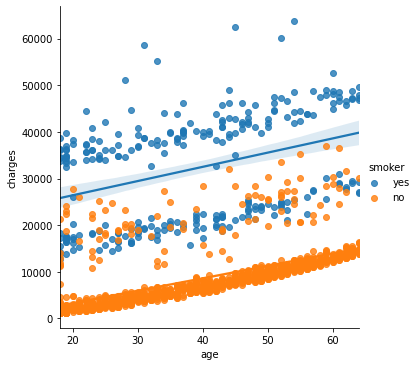

In [18]:
sns.lmplot(x="age",y="charges",hue="smoker",data=data)

In [19]:
#categorical Variable
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(data.sex.drop_duplicates()) 
data.sex=le.transform(data.sex) 

In [20]:
data.sex.value_counts()

1    676
0    662
Name: sex, dtype: int64

In [21]:
le.fit(data.smoker.drop_duplicates()) 
data.smoker = le.transform(data.smoker)

In [22]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [23]:
#region(more than 2 classes here)
le.fit(data.region.drop_duplicates()) 
data.region = le.transform(data.region)

In [24]:
#label Encoding region with 1 2 3 4
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


Text(0.5, 1.0, 'Distribution of charges for non-smokers')

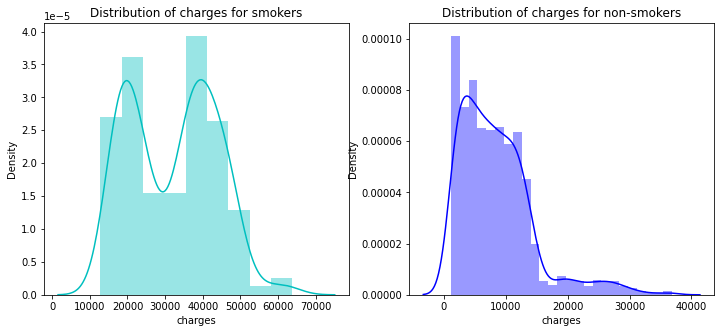

In [25]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(data[(data.smoker == 1)]["charges"],color='c',ax=ax)
ax.set_title('Distribution of charges for smokers')

ax=f.add_subplot(122)
sns.distplot(data[(data.smoker == 0)]['charges'],color='b',ax=ax)
ax.set_title('Distribution of charges for non-smokers')


<AxesSubplot:xlabel='smoker', ylabel='charges'>

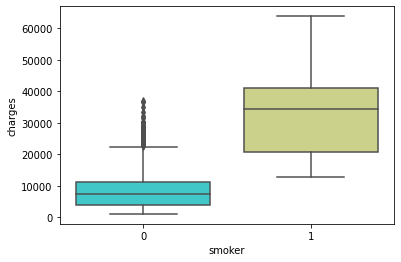

In [26]:
sns.boxplot(x="smoker", y="charges", data =data , palette = 'rainbow')

<AxesSubplot:title={'center':'Box plot for charges of women'}, xlabel='smoker', ylabel='charges'>

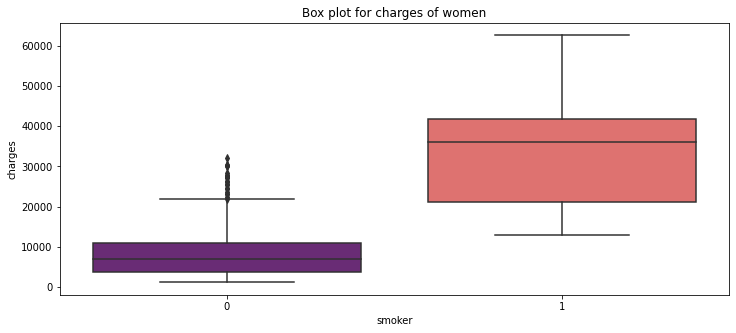

In [27]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges of women")
sns.boxplot(x="smoker", y="charges", data =  data[(data.sex == 1)] , palette = 'magma')

<AxesSubplot:title={'center':'Box plot for charges of men'}, xlabel='smoker', ylabel='charges'>

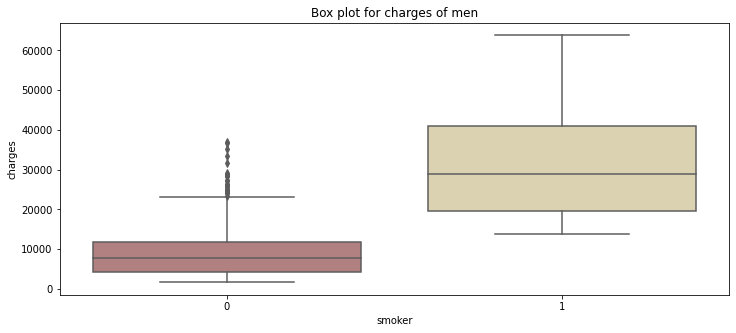

In [31]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges of men")
sns.boxplot(x="smoker", y="charges", data =  data[(data.sex == 0)] , palette = 'pink')

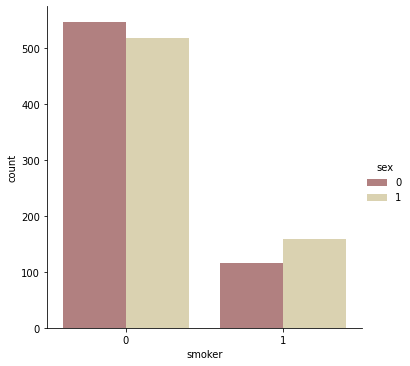

In [32]:
sns.catplot(x="smoker", kind="count",hue = 'sex', palette="pink", data=data)


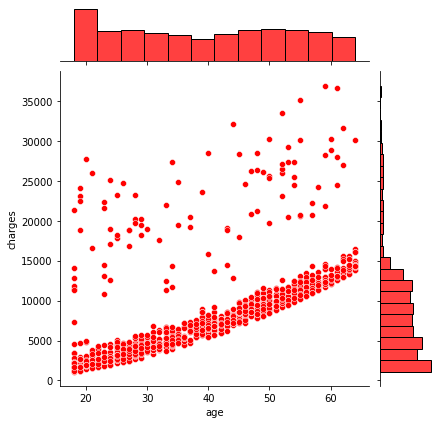

In [33]:
#Smokers age-cost plot
sns.jointplot(x='age',y="charges",data=data[(data.smoker == 0)],color='r')

In [34]:
data['bmi'].describe()

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

<AxesSubplot:xlabel='bmi', ylabel='Density'>

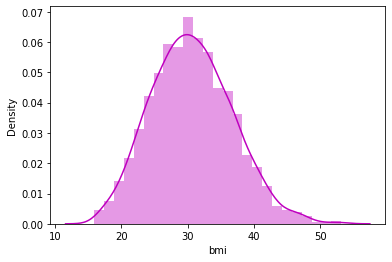

In [35]:
sns.distplot(data["bmi"], color = 'm')

In [36]:
df=data.copy()

In [37]:
df["bmi_above30"]=df.bmi > 30

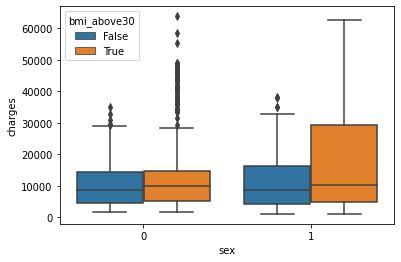

In [38]:
#bmi above 30 and sex boxplotsp
ax = sns.boxplot(x="sex", y="charges", 
                 data=df, hue="bmi_above30" )

<h1>Regression from Scratch<h1>

## Dataframe to numpy and Test-train splits

In [39]:
x=pd.DataFrame(data).to_numpy()
y=pd.DataFrame(data).to_numpy()

In [40]:
t=(int)(0.8*len(x))
x_train,y_train=x[:t,:6],y[:t,6:7]
x_test,y_test=x[t:,:6],y[t:,6:7]
print(x_train.shape,x_test.shape,y_test.shape,y_train.shape)

(1070, 6) (268, 6) (268, 1) (1070, 1)


In [41]:
y_train.shape

(1070, 1)

### Adding bias column

In [42]:
train_b=np.ones((len(x_train),1))
test_b=np.ones((len(x_test),1))

In [43]:
x_train=np.append(x_train,train_b,axis=1)
x_test=np.append(x_test,test_b,axis=1)


In [44]:
weight=np.zeros([1,7],dtype='float64')

In [48]:
y_train[2,0]

4449.462

In [77]:
learning_rate=0.001
iters=20
cost=np.zeros(iters)

In [78]:
p=np.dot(x_train,weight.T)

In [79]:
p.shape

(1070, 1)

In [80]:
weight.shape

(1, 7)

In [81]:
def cost_function(x_train,y_train,weight):
    p=np.dot(x_train,weight.T)
    sum=0
    for i in range(len(p)):
        sum+=(y_train[i,0]-p[i,0])**2
    return sum/len(p)

In [82]:
def gd(weight,x_train,y_train,learning_rate):
    wt=np.zeros([len(x_train),7],dtype='float')
    s=np.zeros([len(x_train),1],dtype='float')
    p=np.dot(x_train,weight.T)
    
    for i in range(len(x_train)):
        for j in range(7):
            wt[i,j]=-2*x_train[i,j]*(y_train[i,0]-p[i,0])
            
    for i in range(7):
        for j in range(len(x_train)): 
            s[i]+=wt[j,i]
            
    for i in range(7):
        weight[0,i]-=(s[i]/(len(x_train)*2))*learning_rate
        
    return weight

In [83]:
def train(x_train,y_train,weight,learning_rate,iters):
    for i in range(iters):
        weight=gd(weight,x_train,y_train,learning_rate)
        cost[i]=cost_function(x_train,y_train,weight)
        if i%100 is 0:
            print(cost_function(x_train,y_train,weight),"\n")

In [84]:
train(x_train,y_train,weight,learning_rate,iters)
mse=cost_function(x_test,y_test,weight)
print("After errors, cost:\n")
print(mse)

1.2646830913917912e+65 

After errors, cost:

3.183903622566285e+73


Text(0.5, 1.0, 'Error vs. Training Epoch')

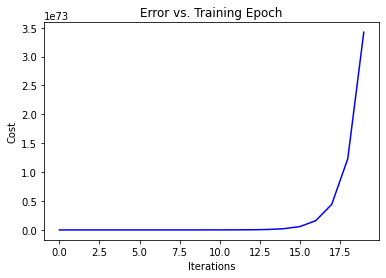

In [85]:
fig, ax = plt.subplots()  
ax.plot(np.arange(iters), cost, 'b')  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Error vs. Training Epoch')  